# PRACTICE 8

## 1 PERTURBATION METHOD + REPRESENT X0,X1,X2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from math import e

In [2]:
x0=Function ('x0') ; x1=Function ('x1') ; x2=Function ('x2') ; x=Function('x');
t=Symbol ('t') ; eps=Symbol ('eps');
x=x0(t)+eps*x1(t)+ eps**2*x2(t);#aproximación  a la solución de la ecuación diferencial 
expr=x.diff(t) + x - eps*x** 2 ;#sustitución en el initial statement 
expr=expand(expr);
collect(expr ,eps)# agrupo por potencias de epsilon 

-eps**5*x2(t)**2 - 2*eps**4*x1(t)*x2(t) + eps**3*(-2*x0(t)*x2(t) - x1(t)**2) + eps**2*(-2*x0(t)*x1(t) + x2(t) + Derivative(x2(t), t)) + eps*(-x0(t)**2 + x1(t) + Derivative(x1(t), t)) + x0(t) + Derivative(x0(t), t)

In [3]:
expr0 = expr.collect(eps).coeff(eps,0)# me quedo con los términos que multiplican por epsilon a la 0 = 1
x0s = dsolve(Eq(expr0,0),x0(t),ics={x0(0):2})#igualo la expresión a 0 y resuelvo sustituyendo x0(t) con las ci
expand(x0s.rhs)

2*exp(-t)

In [4]:
expr1 = expr.collect(eps).coeff(eps,1).subs(x0(t),x0s.rhs)# me quedo con los términos que multiplican por epsilon a la  1, sustituyo lo ya conocido x0t 
print(expr1)
x1s = dsolve(Eq(expr1,0),x1(t),ics={x1(0):0})
expand(x1s.rhs)

x1(t) + Derivative(x1(t), t) - 4*exp(-2*t)


4*exp(-t) - 4*exp(-2*t)

In [5]:
expr2 = expr.collect(eps).coeff(eps,2).subs(x1(t),x1s.rhs).subs(x0(t),x0s.rhs)# me quedo con los términos  epsilon a la  2, sustituyo x1 y x0
print(expr2)
x2s = dsolve(Eq(expr2,0),x2(t),ics={x2(0):0})
print(x2s, '\n')
x_substituted = x.subs(x0(t),x0s.rhs).subs(x1(t),x1s.rhs).subs(x2(t),x2s.rhs)
print(x_substituted)
collect(x_substituted, eps)

-4*(4 - 4*exp(-t))*exp(-2*t) + x2(t) + Derivative(x2(t), t)
Eq(x2(t), (8 - 16*exp(-t) + 8*exp(-2*t))*exp(-t)) 

eps**2*(8 - 16*exp(-t) + 8*exp(-2*t))*exp(-t) + eps*(4 - 4*exp(-t))*exp(-t) + 2*exp(-t)


eps**2*(8 - 16*exp(-t) + 8*exp(-2*t))*exp(-t) + eps*(4 - 4*exp(-t))*exp(-t) + 2*exp(-t)

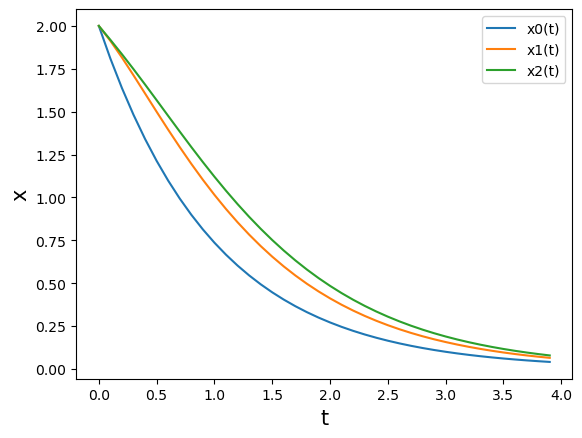

In [6]:
t = symbols('t')
#x=x0(t)+eps*x1(t)+ eps**2*x2(t);
eps=0.3
x0vals = lambdify(t,x0s.rhs, 'numpy')
x01 = x0s.rhs + eps * x1s.rhs
x1vals = lambdify(t,x01, 'numpy')
x012 = x0s.rhs + eps * x1s.rhs + eps**2 * x2s.rhs
x2vals = lambdify(t,x012, 'numpy')
t = np.arange(0, 4, 0.1) 

x_0 = x0vals(t)
x_1 = x1vals(t)
x_2 = x2vals(t)

plt.figure()
plt.plot(t,x_0, label='x0(t)')
plt.plot(t,x_1, label='x1(t)')
plt.plot(t,x_2, label='x2(t)')
plt.legend()
plt.xlabel('t', fontsize = 15)
plt.ylabel('x', fontsize = 15)
plt.show()

## 2 PERTURBATION + DUFFING 

In [7]:
x0=Function ('x0') ; x1=Function ('x1') ; x=Function('x');
t=Symbol ('t') ; eps=Symbol ('eps');
x=x0(t)+eps*x1(t);
expr=x.diff(t,t) + 2*eps*x.diff(t) + x ;
expr=expand(expr);
collect(expr ,eps)

expr0 = expr.collect(eps).coeff(eps,0)

x0s = dsolve(Eq(expr0,0),x0(t),ics={x0(0):1, x0(t).diff(t).subs(t,0):0})

expr1 = expr.collect(eps).coeff(eps,1).subs(x0(t),x0s.rhs)

x1s = dsolve(Eq(expr1,0),x1(t),ics={x1(0):1, x1(t).diff(t).subs(t,0):0})

x_substituted = x.subs(x0(t),x0s.rhs).subs(x1(t),x1s.rhs)
print(trigsimp(x_substituted))

eps*((1 - t)*cos(t) + sin(t)) + cos(t)


In [8]:
t = symbols('t')
xt = x0s.rhs + eps * x1s.rhs
eps=0.1
x0vals = lambdify(t,xt, 'numpy')
x_sol =  exp(t*(-eps + sqrt(eps**2 - 1))) + exp(-t*(eps + sqrt(eps**2 - 1)))
x1vals = lambdify(t,x_sol, 'numpy')
t = np.arange(0, 50, 0.1) 

#x_t = x0vals(t)
x_1 = x1vals(t)


C:\Users\alvar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


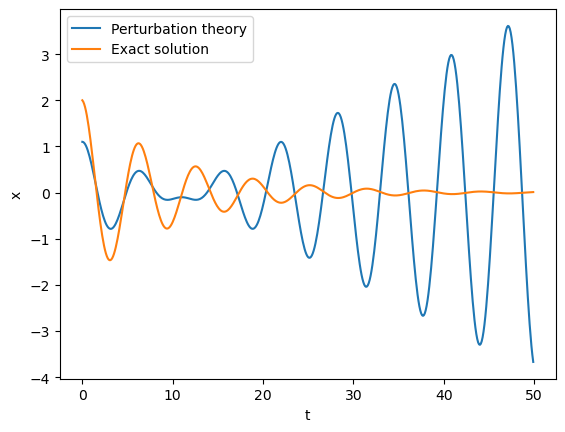

In [9]:
t = symbols('t')
xt = x0s.rhs + eps * x1s.rhs
eps=0.1
x0vals = lambdify(t,xt, 'numpy')
x_sol =  exp(t*(-eps + sqrt(eps**2 - 1))) + exp(-t*(eps + sqrt(eps**2 - 1)))
x1vals = lambdify(t,x_sol, 'numpy')
t = np.arange(0, 50, 0.1) 

x_t = x0vals(t)
x_1 = x1vals(t)


plt.figure()
plt.plot(t,x_t, label='Perturbation theory')
plt.plot(t,x_1, label='Exact solution')

plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [10]:

t = symbols('t')
y = symbols ('y', cls=Function)
eps = symbols('eps')
dEq2 = Eq(y(t).diff(t,t) + 2*eps*y(t).diff(t) + y(t), 0 )
soldEq2 = dsolve(dEq2,y(t))
print(soldEq2)

Eq(y(t), C1*exp(t*(-eps + sqrt(eps**2 - 1))) + C2*exp(-t*(eps + sqrt(eps**2 - 1))))


## 3 TWO-TIMING + VANDERPOL

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
x0=Function ( 'x0 ' ) ; x1=Function ( ' x1'  ) ; x2=Function ( 'x2' ) ; x=Function ('x') ;
t=Symbol ( 't') ; eps=Symbol ( 'eps' ) ;T=Symbol ( 'T') 
xx= x0( t,T )+eps*x1 ( t,T );
display(xx)
xdot = Derivative(x(t, T), (t)) + eps*Derivative(x(t,T), (T))
xddot  = Derivative(x0(t, T), (t,2)) + eps*(Derivative(x1(t,T),(t,2))+2*Derivative(x0(t, T),T,t)) 
display(xddot)
vander =  xddot + xx + eps*(xx**2-1)*xdot
display(vander)


eps* x1(t, T) + x0 (t, T)

eps*(Derivative( x1(t, T), (t, 2)) + 2*Derivative(x0 (t, T), T, t)) + Derivative(x0 (t, T), (t, 2))

eps*(eps*Derivative(x(t, T), T) + Derivative(x(t, T), t))*((eps* x1(t, T) + x0 (t, T))**2 - 1) + eps*(Derivative( x1(t, T), (t, 2)) + 2*Derivative(x0 (t, T), T, t)) + eps* x1(t, T) + x0 (t, T) + Derivative(x0 (t, T), (t, 2))

In [12]:
display(vander.coeff(eps,0))

x0 (t, T) + Derivative(x0 (t, T), (t, 2))

In [13]:
vander.coeff(eps,1)

(eps*Derivative(x(t, T), T) + Derivative(x(t, T), t))*((eps* x1(t, T) + x0 (t, T))**2 - 1) +  x1(t, T) + Derivative( x1(t, T), (t, 2)) + 2*Derivative(x0 (t, T), T, t)